In [ ]:
# 1. '여가부 폐지' 등의 특정 키워드로 크롤링한 데이터는'이재멷', '윤석열' 이라는 제너럴한 키워드로 크롤링한 데이터와 겹치는게 많은 것 같음 그래서 제너럴한 키워드의 데이터만 쓰는 것은 어떤지
# 2. 정규표현식으로 해시태그를 제거해서 전처리 하는 것 보단 해시태그를 이용한 분석을 하는 것도 좋다고 생각함

In [75]:
import pandas as pd 
import numpy as np
import os
import re 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [76]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
election = pd.read_csv('dataset/election.csv')

In [11]:
election = election.drop_duplicates()

In [13]:
women_policy = pd.read_csv('dataset/women_policy.csv')

In [15]:
# 혹시 모를 중복제거
women_policy = women_policy.drop_duplicates()

In [48]:
# 혹시 모를 nan값 확인
women_policy.isna().sum()

datetime    0
id          0
text        0
username    0
dtype: int64

In [39]:
# 정규표현식 이용한 전처리
def clean(text):
    #\n 공백 제거
    text = re.sub('\n',' ',str(text))
    # URL 제거
    text = re.sub('https://[A-Za-z0-9./]*','',str(text))
    # 한글자 제거 (ex:ㅋㅋ, ㅜㅜ)
    text = re.sub('([ㄱ-ㅎㅏ-ㅣ])+', '', str(text))
    return str(text)

In [42]:
women_policy['text'] = women_policy['text'].apply(lambda x : clean(x))

In [ ]:
# common words
# 불용어 제거

그림 저장: Top 20 who the most writes


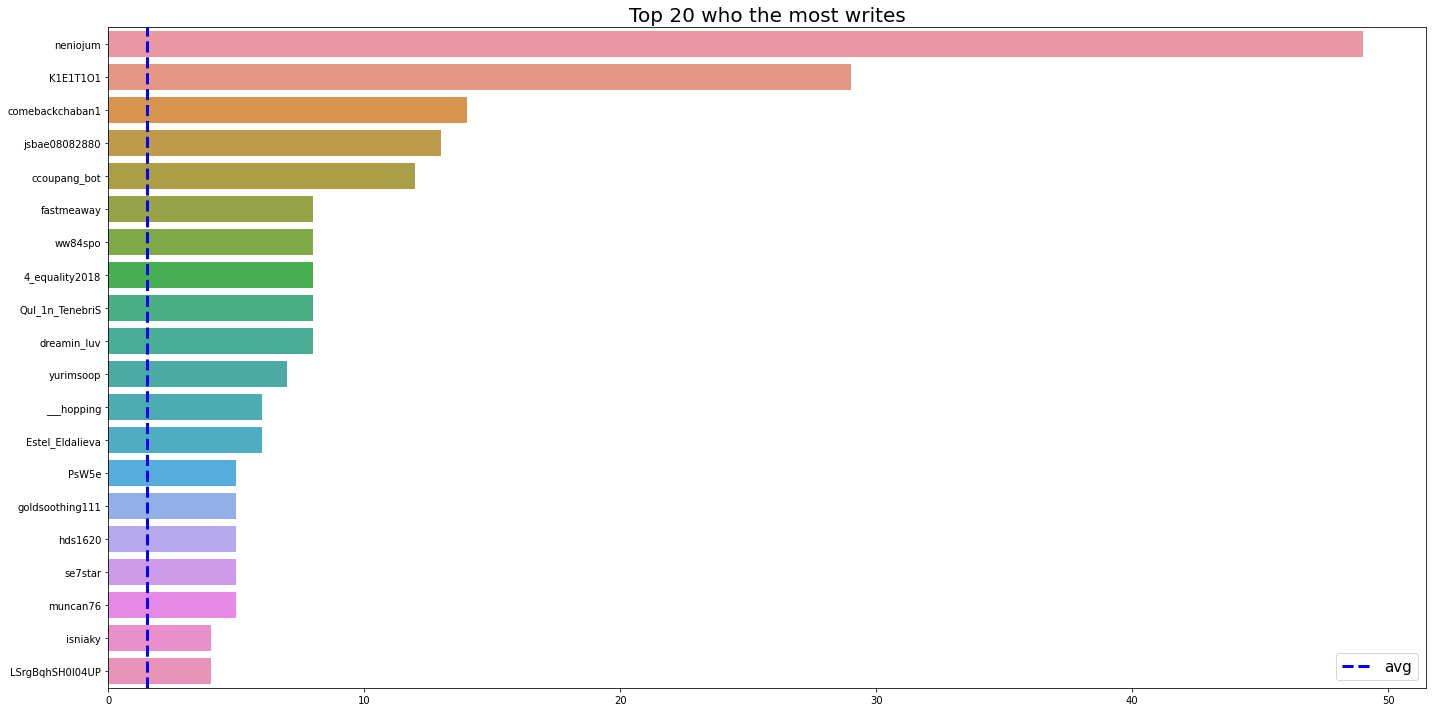

In [124]:
# 어떤 유저가 가장 많이 트윗을 썻는지
plt.figure(figsize=(20,10))
sns.barplot(x=women_policy['username'].value_counts()[:20].values, 
            y=women_policy['username'].value_counts()[:20].index,
           orient='h')
plt.title('Top 20 who the most writes', fontsize=20)
plt.axvline(x=np.average(women_policy['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
# save_fig('Top 20 who the most writes')

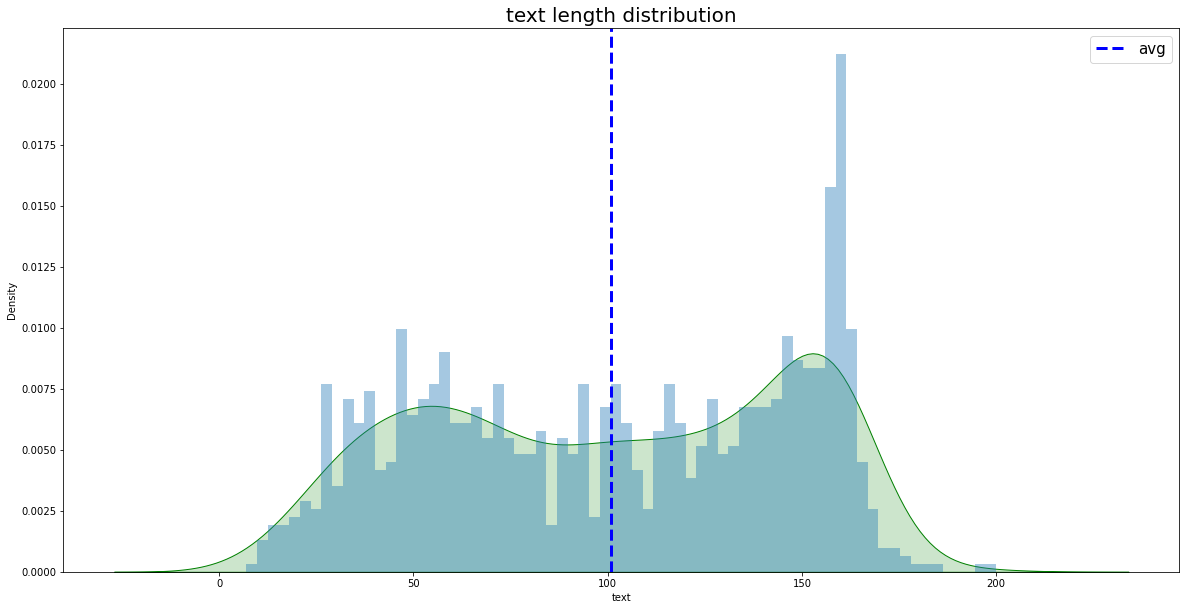

In [146]:
# 전체 문장 길이 분포
plt.figure(figsize=(20,10))
sns.distplot(a=women_policy['text'].str.len(), bins=70, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('text length distribution', fontsize=20)
plt.axvline(x=np.average(women_policy['text'].str.len()), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
# save_fig('text length distribution')

In [ ]:
# 각 후보 포함된 트윗 분석